#### Import modules

In [18]:
import yfinance as yf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
import datetime as dt
from datetime import date
import mplfinance as mpf
import scipy.optimize as sci_plt
import math

from pprint import pprint
from fake_useragent import UserAgent
from sklearn.preprocessing import StandardScaler

##### Set tickers & Dates

In [19]:

tickers = [
    # Technology
    "NVDA", "META",
    
    # Finance
    "JPM", "BAC",
    
    # Healthcare
    "JNJ", "PFE",
    
    # Energy
    "XOM", "CVX",
    
    # Consumer Discretionary
    "AMZN", "NKE"
]
start_date = dt.datetime(2023, 7, 21)
#end_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime.today().date()

#### Load the data 


In [20]:
stock_data = yf.download(tickers, start_date, end_date, multi_level_index=False, auto_adjust= False)
stock_closing_prices = stock_data['Adj Close']


[*********************100%***********************]  10 of 10 completed


#### Visualise the stock data over time 

Ticker            AMZN        BAC         CVX         JNJ         JPM  \
Date                                                                    
2023-07-21  130.000000  30.312695  145.713715  159.816711  147.828659   
2023-07-24  128.800003  30.947763  148.587784  160.652451  150.738510   
2023-07-25  129.130005  30.473835  149.267242  161.882645  149.612762   
2023-07-26  128.149994  30.720278  148.147003  162.192520  150.509521   
2023-07-27  128.250000  30.284260  146.604416  163.103394  148.849518   

Ticker            META         NKE       NVDA        PFE        XOM  
Date                                                                 
2023-07-21  292.654480  105.267868  44.281746  33.200748  96.974724  
2023-07-24  290.018890  104.987938  44.584568  33.298393  98.496223  
2023-07-25  292.863342  104.534294  45.650909  32.898922  98.645561  
2023-07-26  296.940948  105.499519  45.424042  33.032078  98.094841  
2023-07-27  310.009277  103.926186  45.871769  32.493515  98.402885 

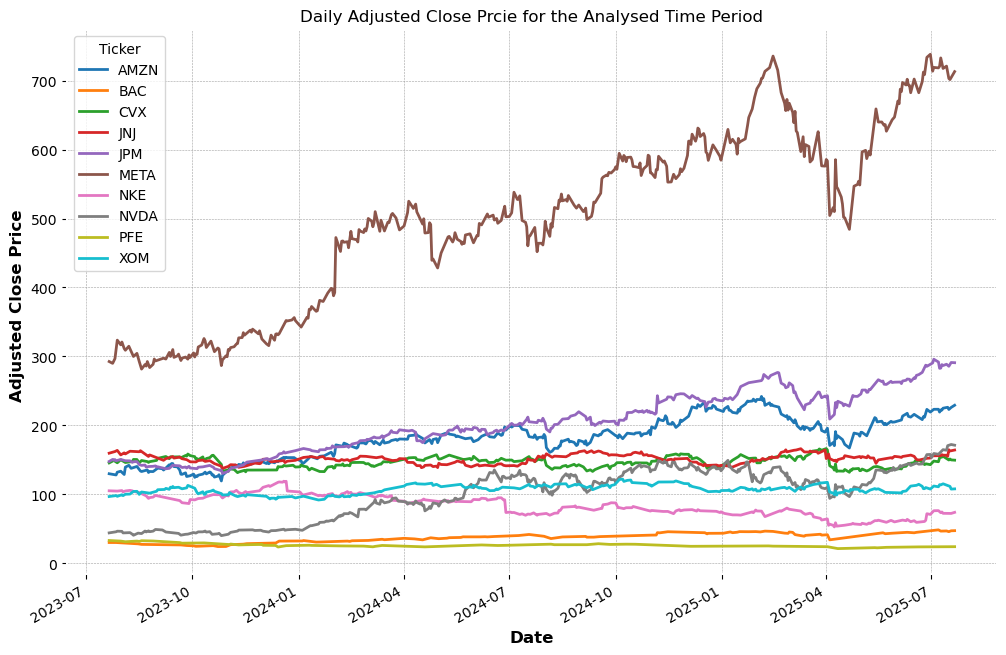

<Figure size 640x480 with 0 Axes>

In [21]:
stock_closing_prices = stock_data['Adj Close']
stock_closing_prices.plot(figsize=(12,8))
print(stock_closing_prices.head())
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ')
plt.title('Daily Adjusted Close Prcie for the Analysed Time Period')
plt.show()
plt.clf()

#### Candlestick & Volume

C:\Users\locka\AppData\Local\Temp\ipykernel_39924\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


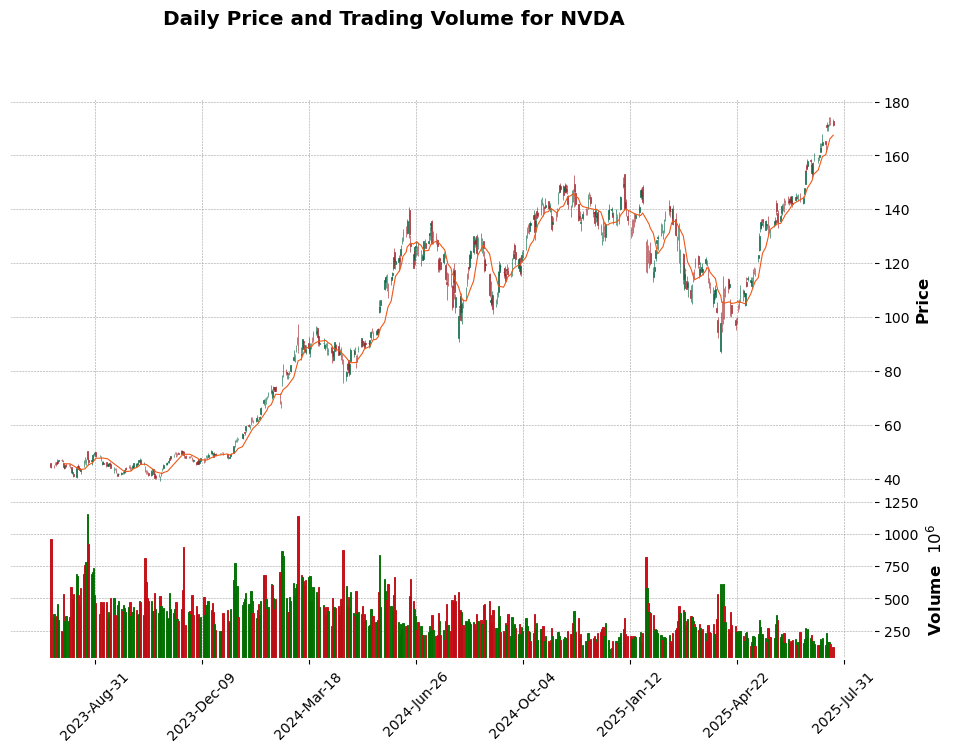

C:\Users\locka\AppData\Local\Temp\ipykernel_39924\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


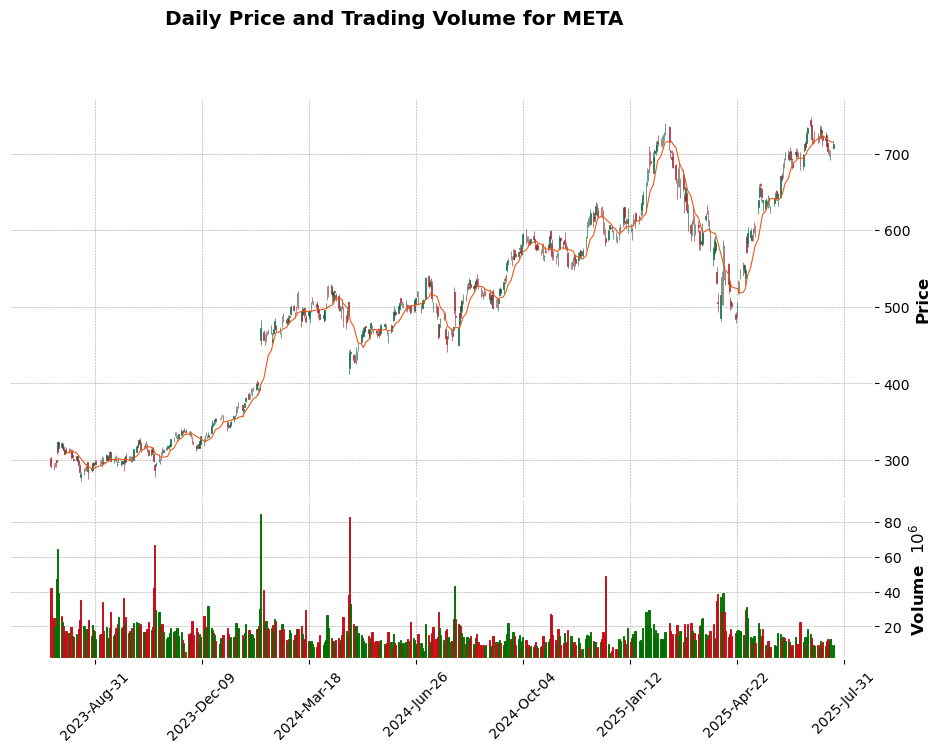

C:\Users\locka\AppData\Local\Temp\ipykernel_39924\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


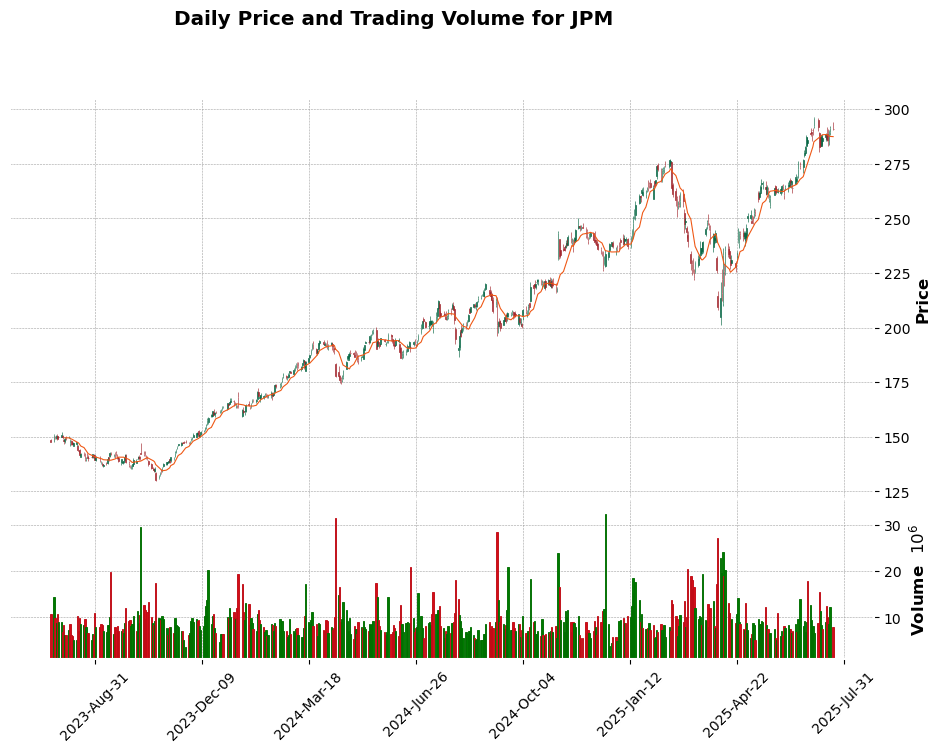

C:\Users\locka\AppData\Local\Temp\ipykernel_39924\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


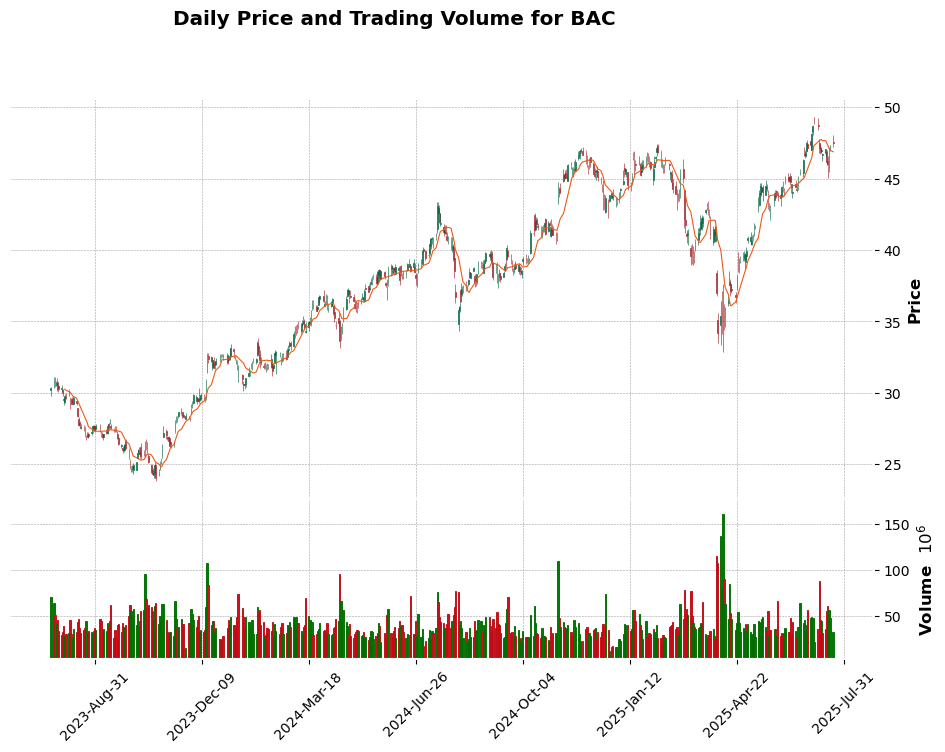

C:\Users\locka\AppData\Local\Temp\ipykernel_39924\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


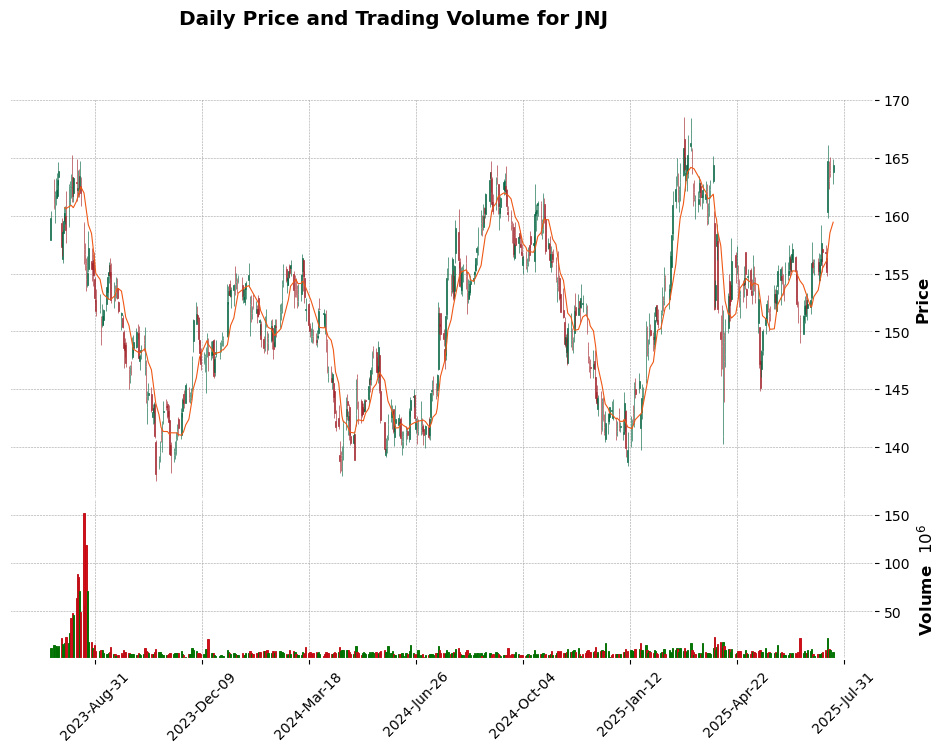

C:\Users\locka\AppData\Local\Temp\ipykernel_39924\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


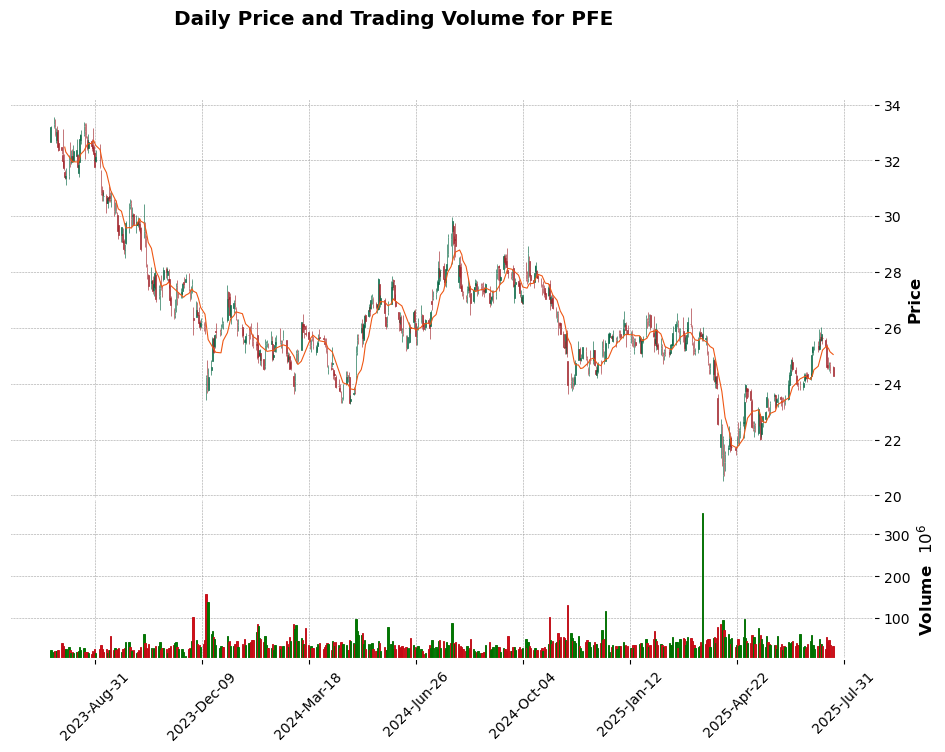

C:\Users\locka\AppData\Local\Temp\ipykernel_39924\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


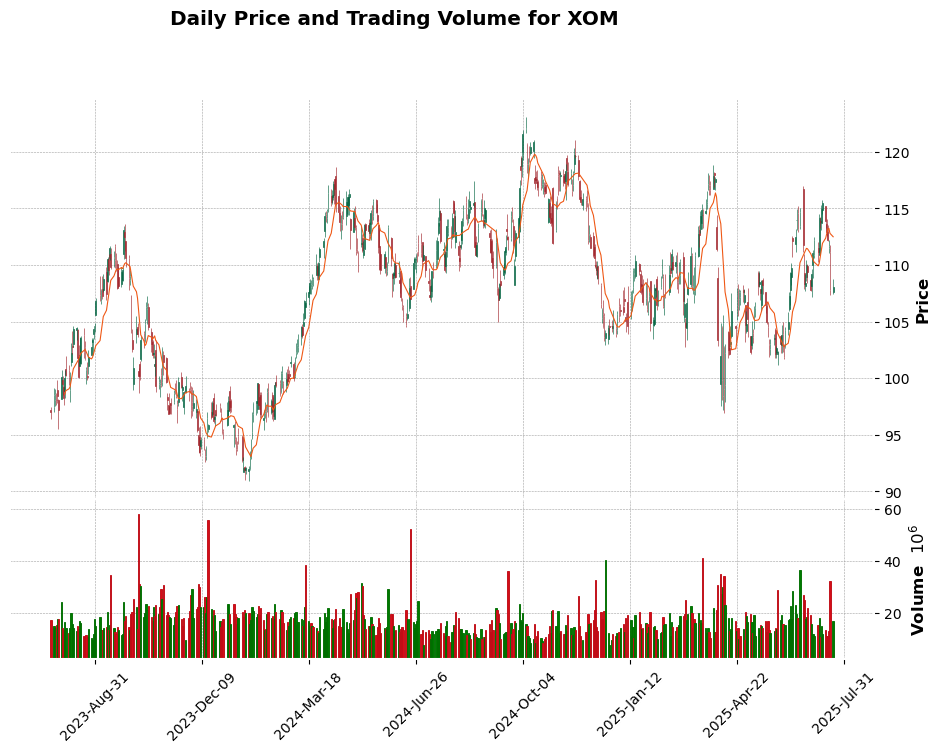

C:\Users\locka\AppData\Local\Temp\ipykernel_39924\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


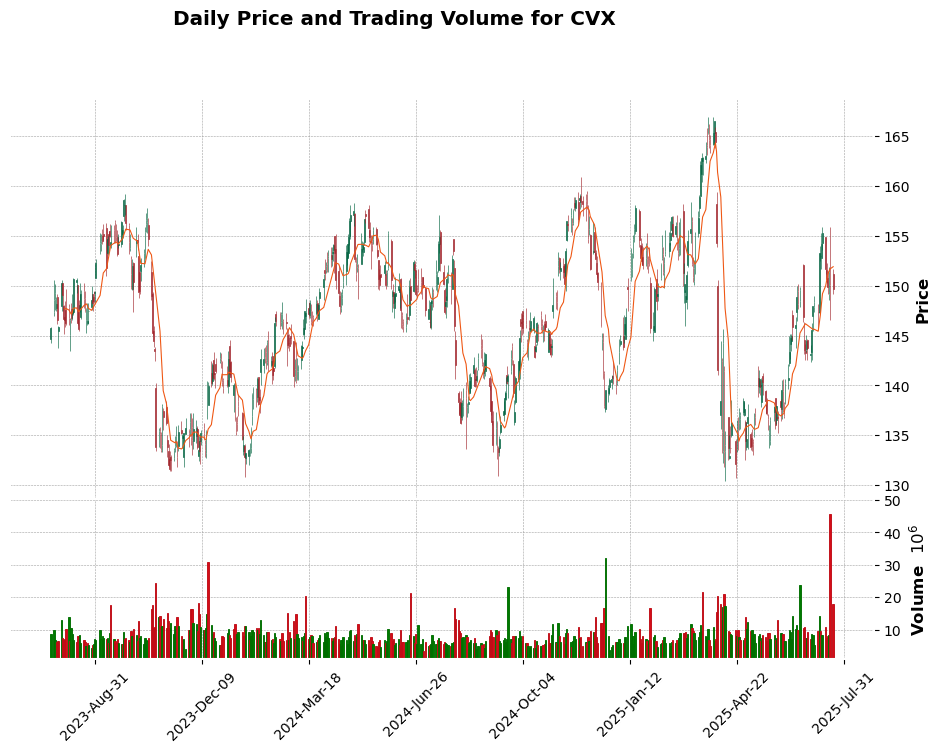

C:\Users\locka\AppData\Local\Temp\ipykernel_39924\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


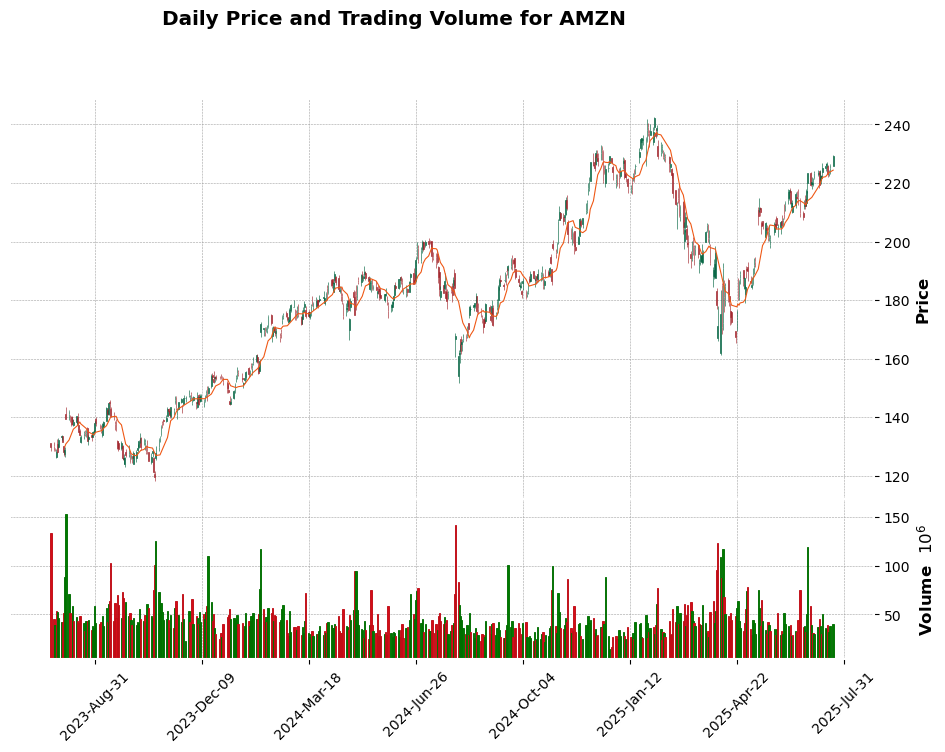

C:\Users\locka\AppData\Local\Temp\ipykernel_39924\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


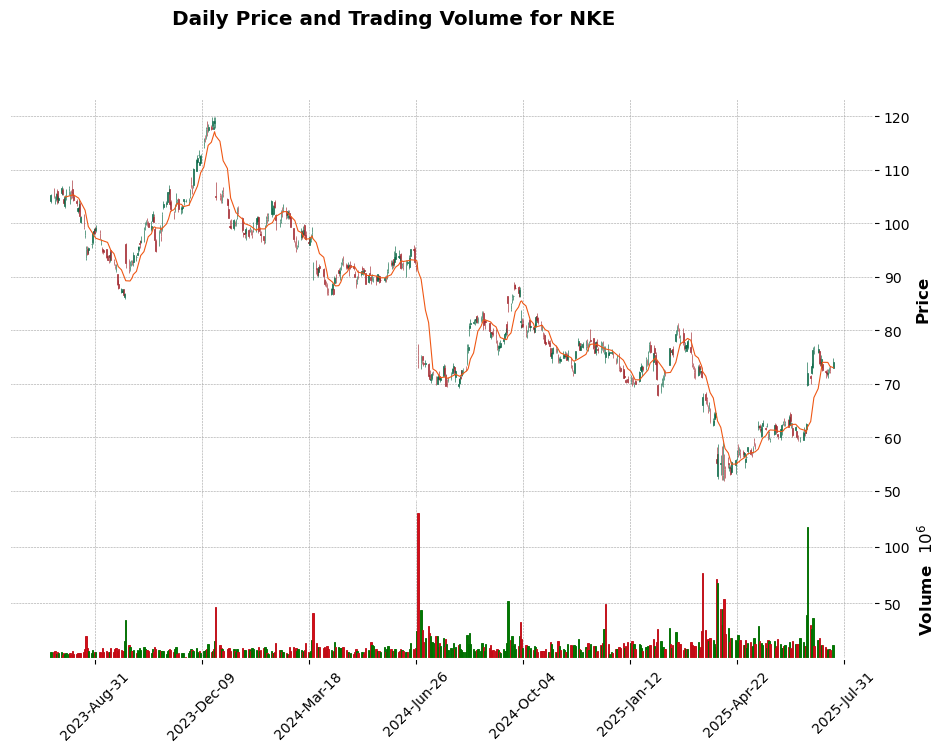

In [22]:
for tick in tickers:
        data = yf.download(tick, start_date, end_date, multi_level_index= False)
        mpf.plot(data, type = 'candle', mav = 10, style = 'charles', volume = True, show_nontrading = True, tight_layout = False, figsize= (12,8), title = f'Daily Price and Trading Volume for {tick}')

#### Calculate and Visualise the daily simple rate of return

Empty DataFrame
Columns: []
Index: []
AMZN    0.001135
BAC     0.000897
CVX     0.000054
JNJ     0.000056
JPM     0.001354
META    0.001781
NKE    -0.000704
NVDA    0.002707
PFE    -0.000627
XOM     0.000216
dtype: float64


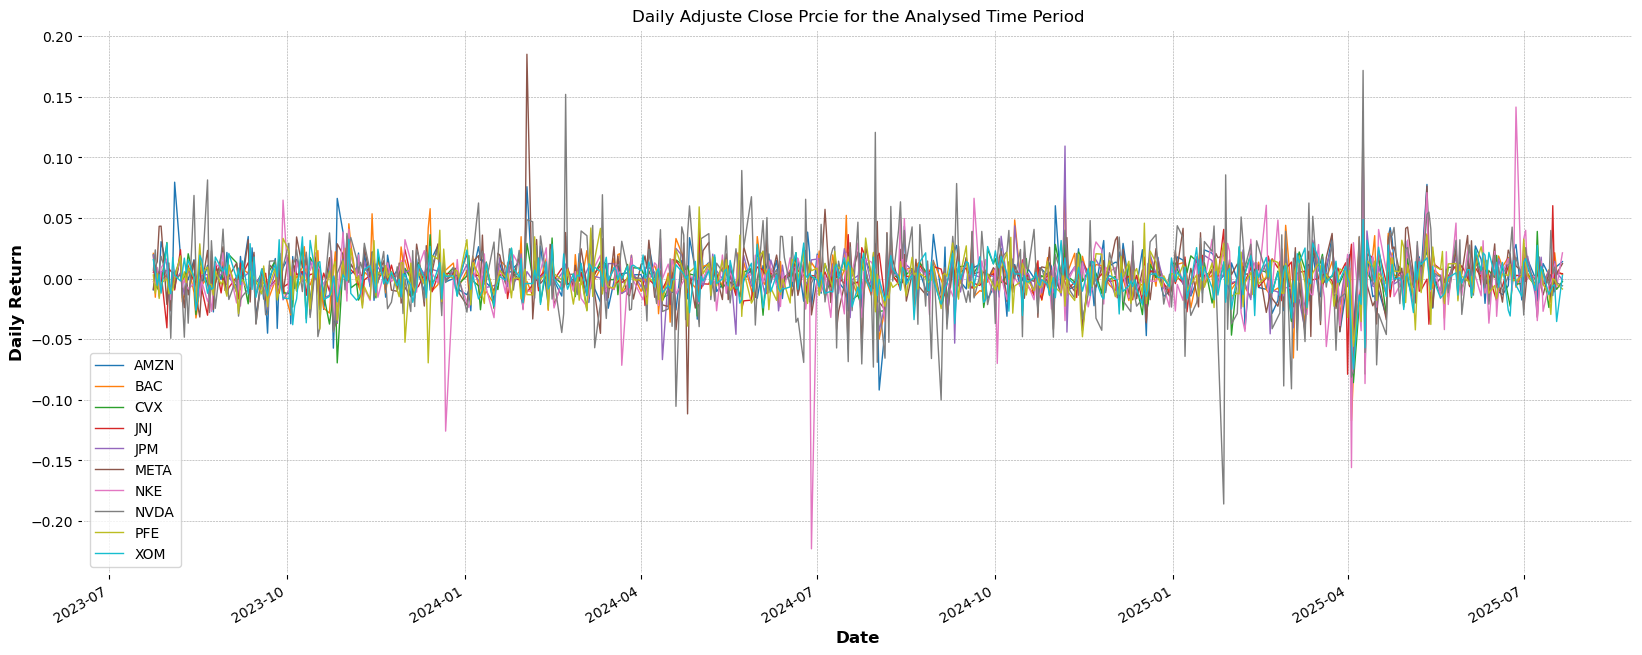

In [23]:
daily_return = pd.DataFrame()
print(daily_return.head())
for column in stock_closing_prices.columns:
    daily_return[column] = np.log(stock_closing_prices[column]/stock_closing_prices[column].shift(1))
daily_return = daily_return.dropna()
print(daily_return.mean())
daily_return.plot(linewidth = 1, figsize= (20,8))
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Adjuste Close Prcie for the Analysed Time Period')
plt.show()



#### Create subplots of daily simple rate of return over time.

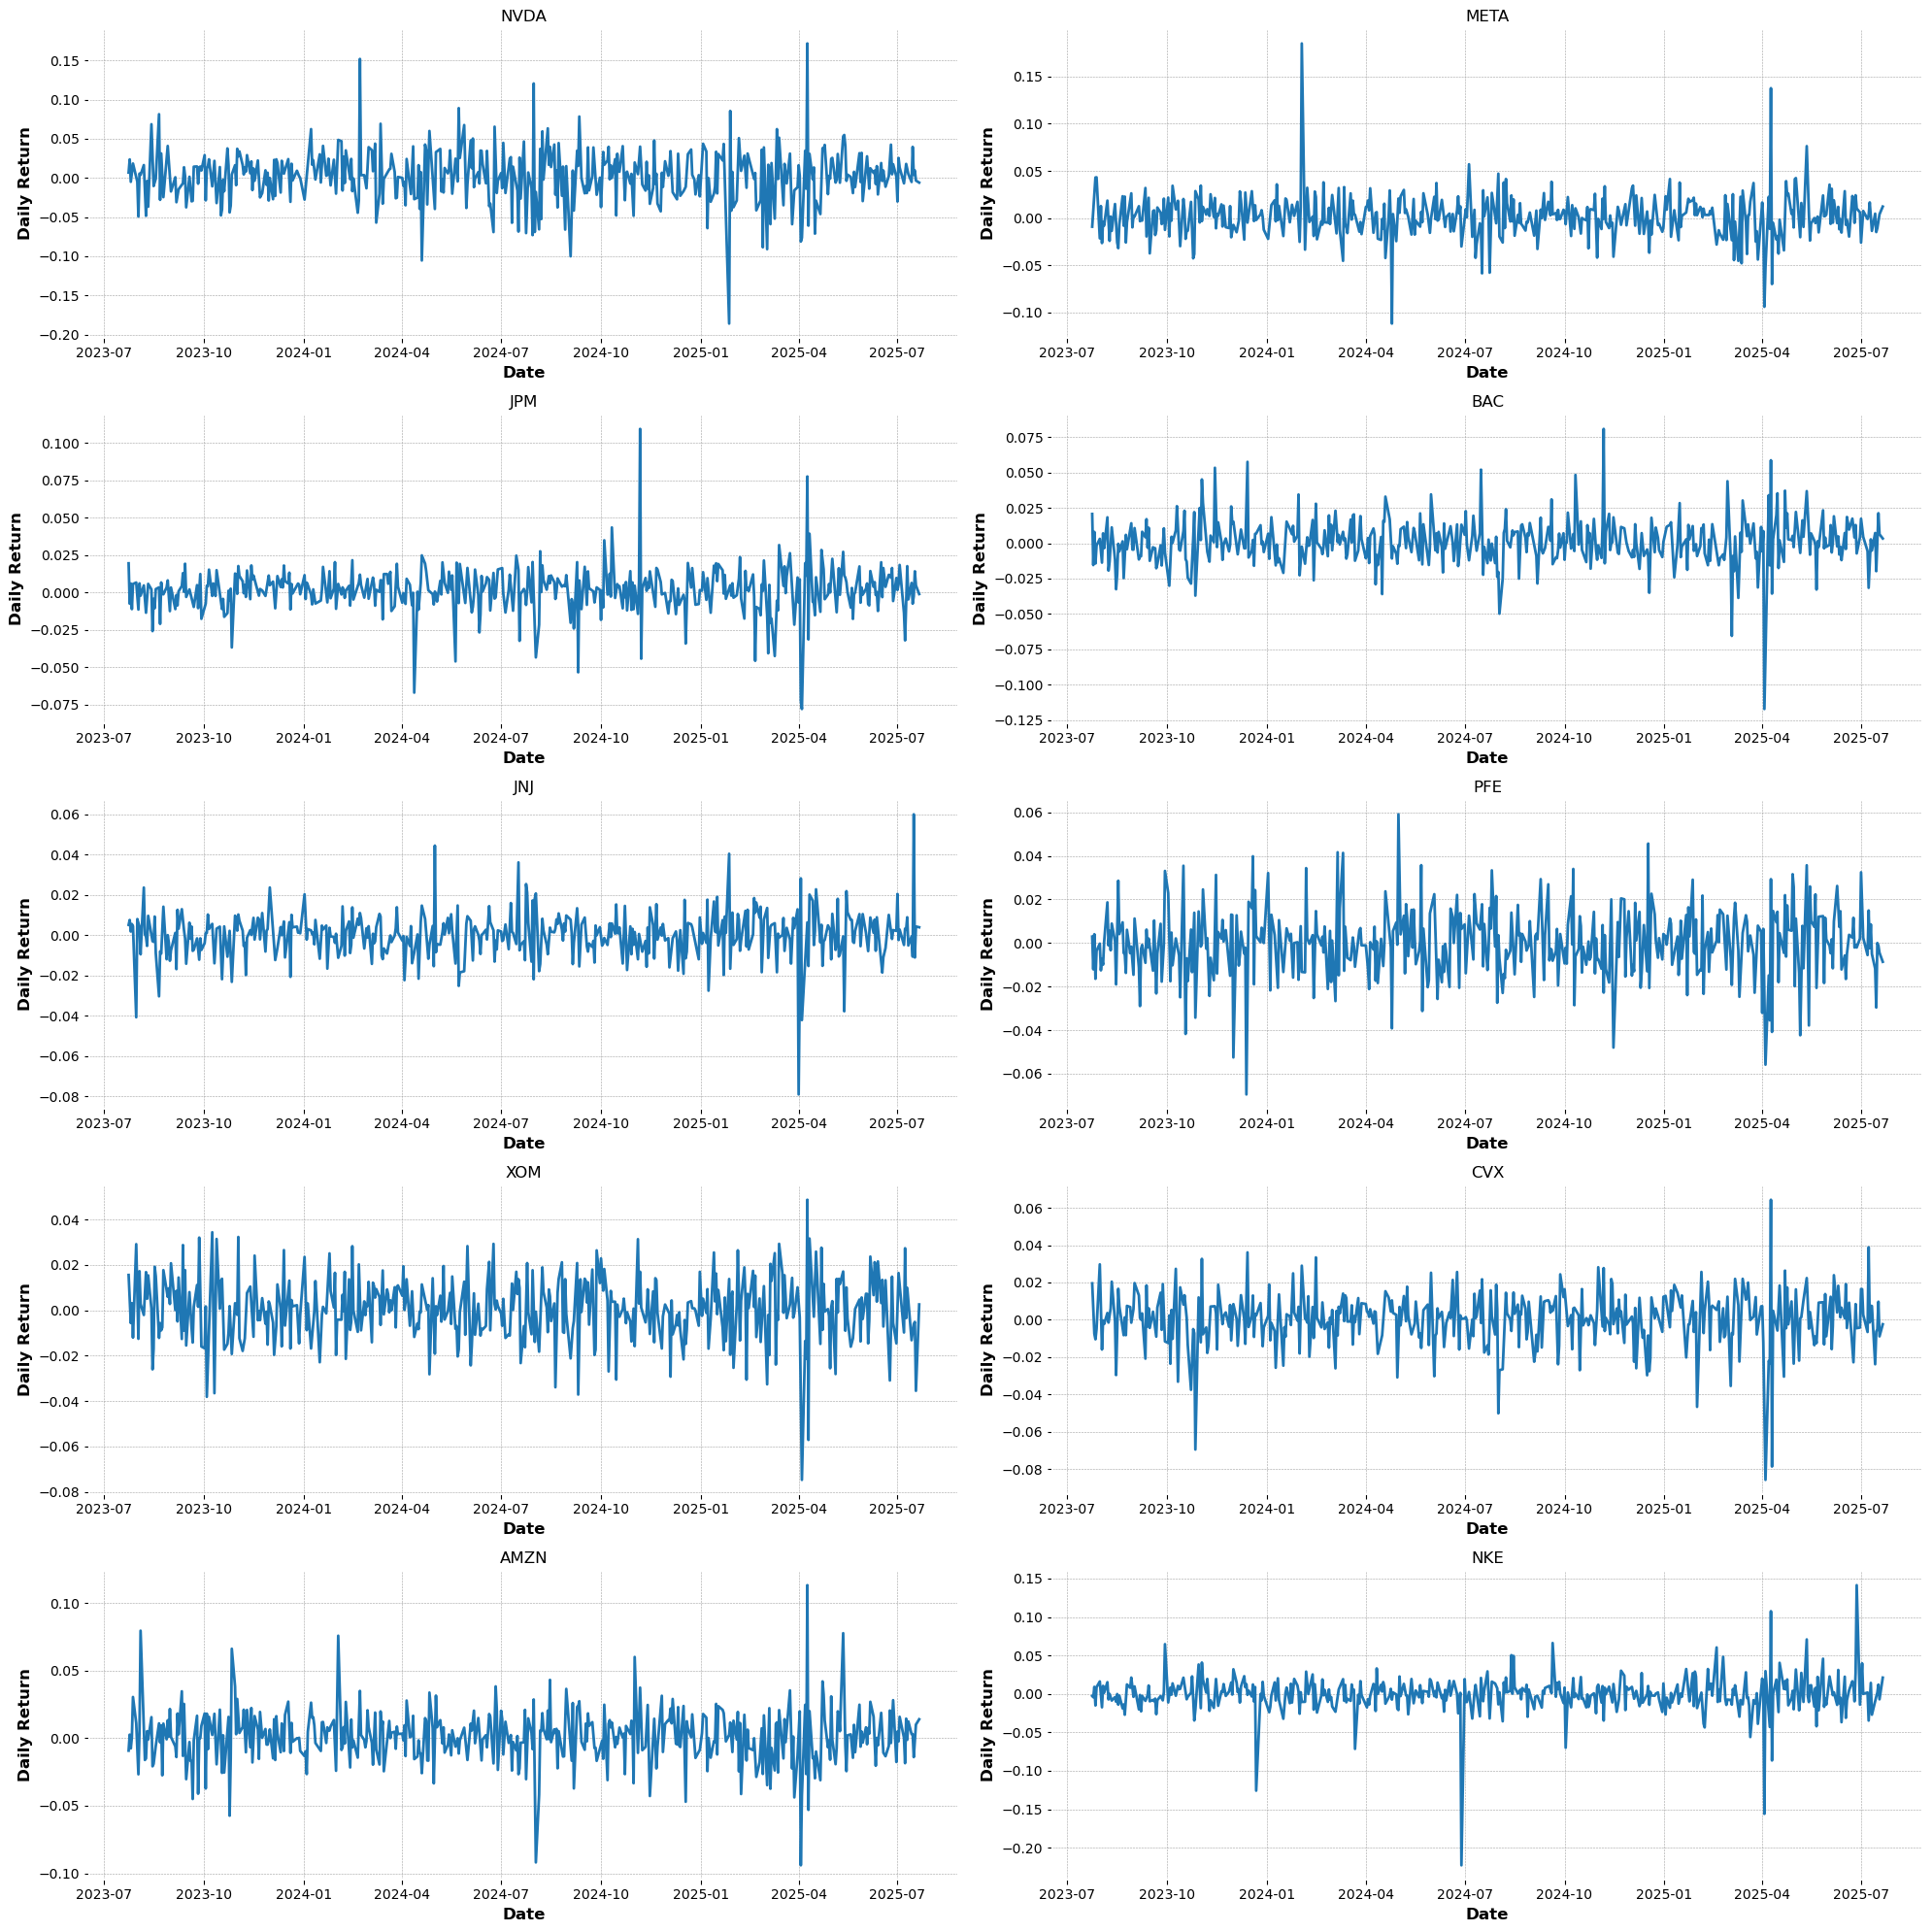

In [24]:
plot_size = len(tickers)/2
plot_size = int(math.ceil(plot_size))
fig, axes = plt.subplots(plot_size, 2, figsize = (20,20))
axes = axes.flatten()

for i , tick in enumerate(tickers):
    axes[i].plot(daily_return[tick])
    axes[i].set_title(tick)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Daily Return')
if len(tickers)<len(axes):
    fig.delaxes(axes[len(tickers)])

fig.tight_layout()
plt.show()

#### Compute the daily mean rate of return

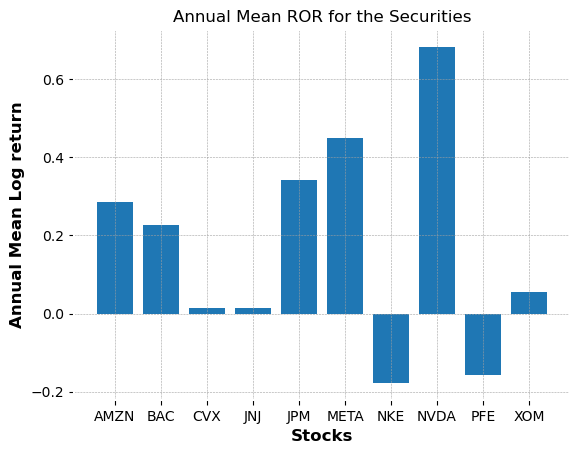

In [25]:
annual_mean = daily_return.mean()*252
plt.bar(annual_mean.index, annual_mean.values)
plt.xlabel("Stocks")
plt.ylabel("Annual Mean Log return")
plt.title("Annual Mean ROR for the Securities")
plt.show()

#### Compute and compare Standard deviation

Text(0.5, 1.0, 'Daily Standard Deviation for the Portfolio Stocks')

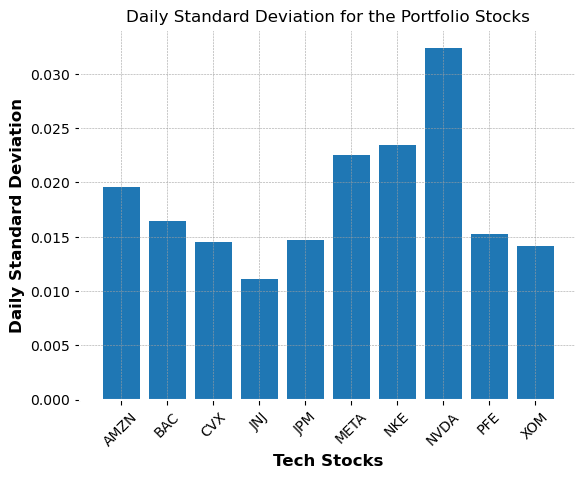

In [26]:
daily_std = daily_return.std()
daily_std
plt.bar(daily_std.index, daily_std.values)
plt.xlabel("Tech Stocks")
plt.xticks(rotation = 45)
plt.ylabel("Daily Standard Deviation")
plt.title("Daily Standard Deviation for the Portfolio Stocks")

#### Calculate and visualise the correlation between the companies.

Text(0.5, 1.0, 'Correlation Matrix Between All the stocks in the index')

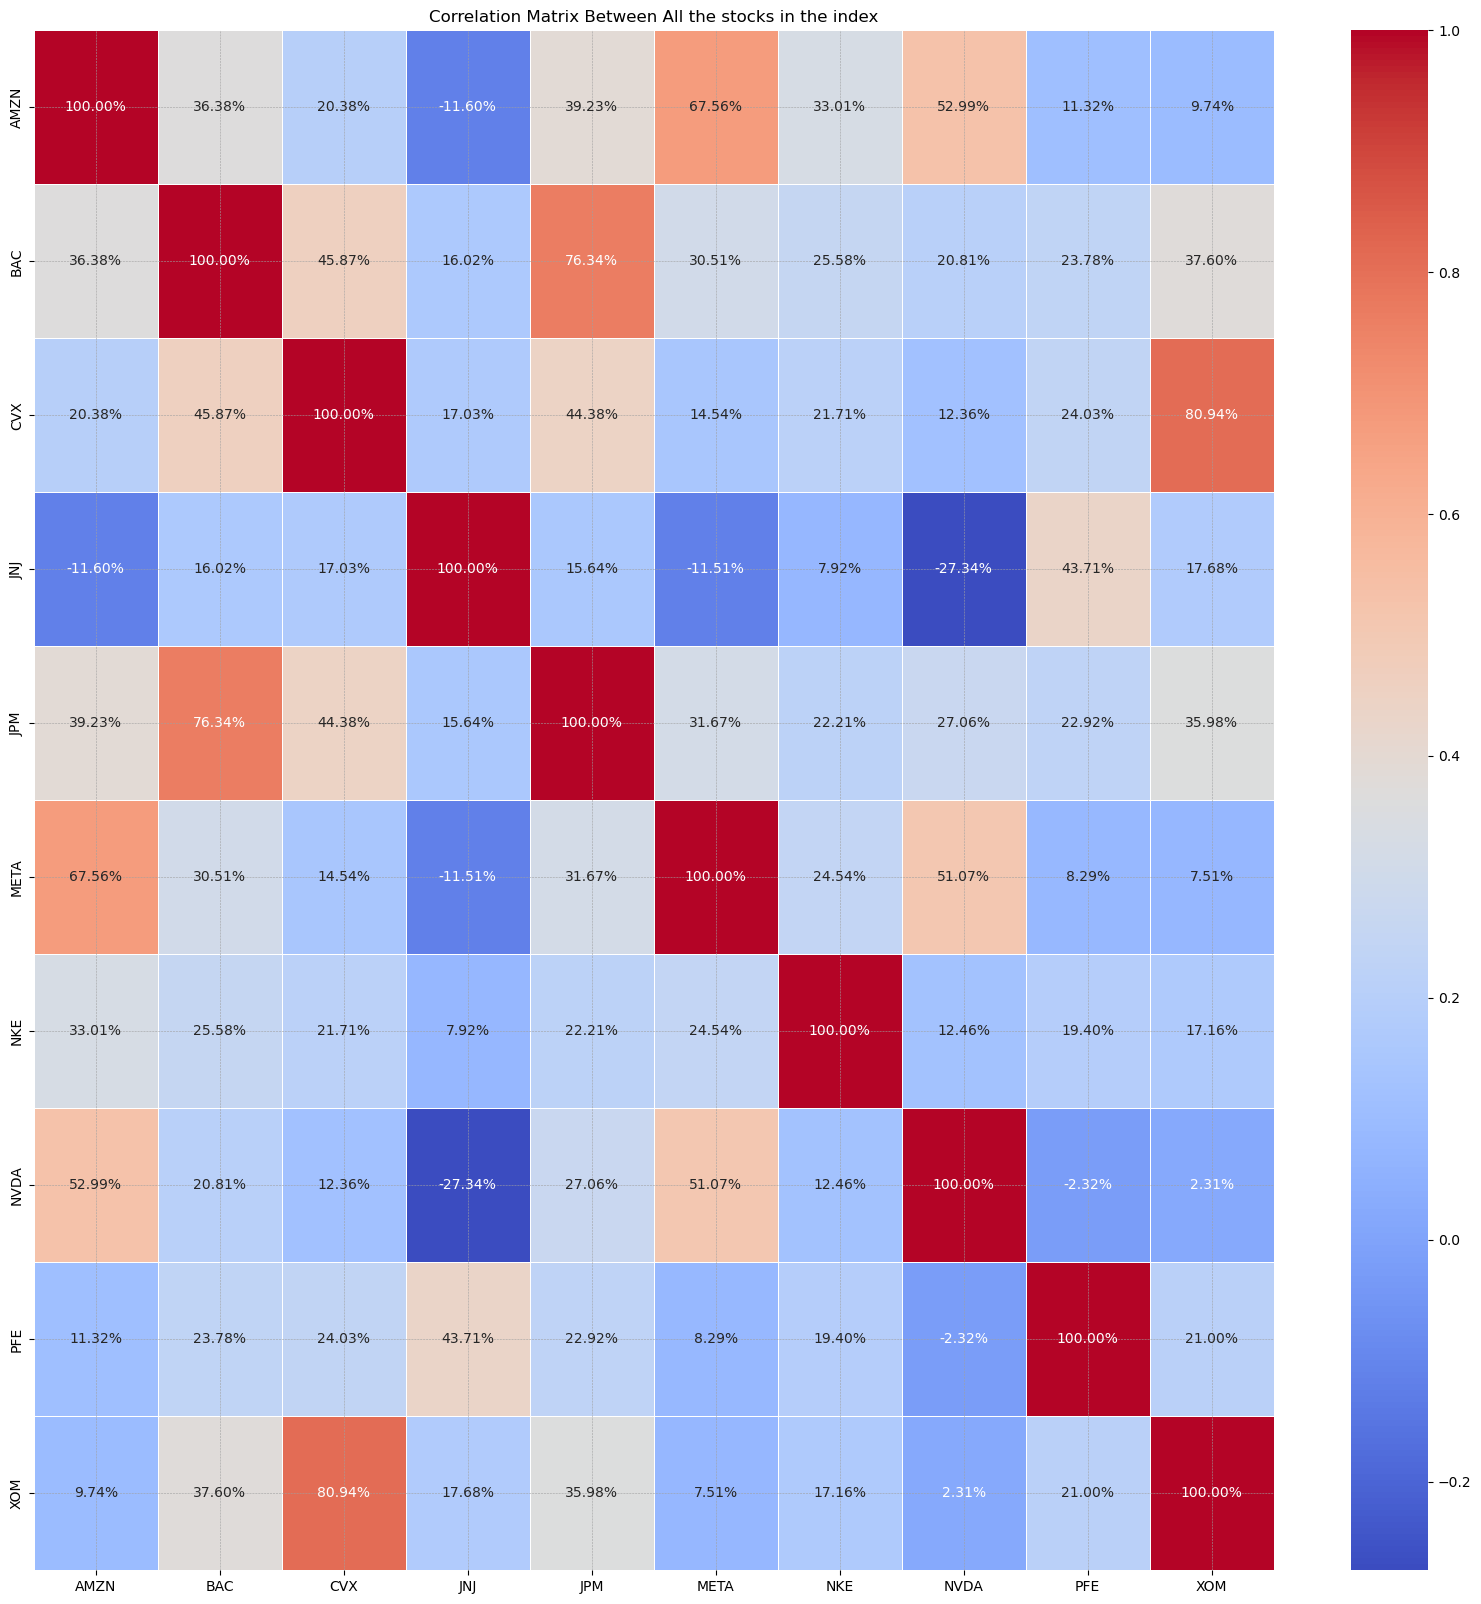

In [27]:
corr_matrix = daily_return.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix, annot = True, fmt ='.2%', cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix Between All the stocks in the index')



### Efficiency Frontier Plotting


The Sharpe Ratio, is used as a measure for calculating risk-adjusted return and has been the industry standard for such calculations. The Sharpe Ratio allows us to quantify the relationship the average return earned in excess of the risk-free rate per unit of volatility or total risk."

In [28]:
#Define the number of times we want to run the simulation
num_of_portfolios = 10000
num_securities = len(tickers)

#Calculate Log return 
log_return = np.log(1 + stock_closing_prices.pct_change())
log_return.dropna(inplace= True)

#Risk Free rate
from fredapi import Fred
fred = Fred(api_key = '58d5fc9d57b922a18576edf7c5210972')
ten_year_treasury_rate = fred.get_series_latest_release('GS10') / 100
risk_free_rate = ten_year_treasury_rate.iloc[-1]
print(risk_free_rate)

#Prep the Weight Array of Numpy Zeros, This is a list of lists 
all_weights = np.zeros((num_of_portfolios, num_securities))

#Prep the Returns Array of Numpy Zeros
return_arr= np.zeros(num_of_portfolios)

#Prep the Volatility Array of Numpy Zeros
vol_arr= np.zeros(num_of_portfolios)

#Prep the Sharpe Array of Numpy Zeros
sharpe_ratio_arr= np.zeros(num_of_portfolios)

#Start the simulation
for i in range(num_of_portfolios):

    #First Calculate the weights
    weights = np.array(np.random.random(num_securities))

    #Generate the rebalanced weight. So they equal 1
    weights = weights / sum(weights)
    
    #Assign to weight Array
    all_weights[i, :] = weights

    #Calculate the Expected return for entire portfolio for the whole year and assign to array
    return_arr[i] = np.sum((log_return.mean() * weights))* 252

    #Calculate the expected volatility (risk or SD)
    vol_arr[i] = np.sqrt(
        np.dot(
            weights.T, 
               np.dot(log_return.cov() *252, weights)
               )
    )

    #Compute the sharpe and assign 
    sharpe_ratio_arr[i] = (return_arr[i] - risk_free_rate) / vol_arr[i]

#Combine All the data together
simulations_data = [return_arr, vol_arr, sharpe_ratio_arr, all_weights]

#Create the Dataframe
simulations_df = pd.DataFrame(data = simulations_data).T
#Add column Title
simulations_df.columns = ['Returns', 'Volatility', 'Sharpe Ratio', 'Weights']

#Make sure the data types are correct 
simulations_df = simulations_df.infer_objects()
print('')
print('='*80)
print('Simulation data:')
print('='*80)
print(simulations_df.head())
print('-'*80)

#Get minimum Volatility
min_vol_idx = simulations_df['Volatility'].idxmin()
min_vol_x = simulations_df.loc[min_vol_idx, 'Volatility']
min_vol_y = simulations_df.loc[min_vol_idx, 'Returns']

#Get the max sharpe
max_sharpe_idx = simulations_df['Sharpe Ratio'].idxmax()
max_sharpe_x = simulations_df.loc[max_sharpe_idx, 'Volatility']
max_sharpe_y = simulations_df.loc[max_sharpe_idx, 'Returns']

0.0438

Simulation data:
    Returns  Volatility  Sharpe Ratio  \
0  0.164339    0.179789      0.670450   
1  0.169466    0.178430      0.704289   
2  0.085067    0.168815      0.244454   
3  0.155606    0.159883      0.699296   
4  0.180937    0.167628      0.818100   

                                             Weights  
0  [0.12780617021491913, 0.12593543343184402, 0.0...  
1  [0.12387584931688282, 0.07040932658027643, 0.0...  
2  [0.09926540203959916, 0.015485209990423333, 0....  
3  [0.13870526987576756, 0.168159516479569, 0.086...  
4  [0.07621109351772472, 0.17896533500304931, 0.1...  
--------------------------------------------------------------------------------


## Optimization 

To run my portfolio optimization method, I first define a couple of key functions that support the process. The first is get_metrics(), which returns the relevant metrics (like return, volatility, and Sharpe ratio) for any given set of portfolio weights. You can think of this function as a kind of look up. It lets me compute portfolio performance for any combination of asset allocations.

The second function is neg_sharpe(), which I use as the objective function for the optimization process. Since scipy.optimize.minimize() only minimizes (and doesn’t have a maximize option), I take the negative of the Sharpe ratio, this way, minimizing it effectively gives me the portfolio with the maximum Sharpe ratio.

#### Define Functions required for scipy.optmaization 

In [29]:
#Create the get metrics function (excepts list type and returns numpy array) (-> is a type hint)
def get_metric(weights: list): # -> np.array:
    #Conver the weights to a numpy array
    weights = np.array(weights)

    #Calculate the returns.
    ret= np.sum(log_return.mean() * weights)*252

    #Calculate the volatility
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov() * 252, weights) ))

    #Calculate the sharpe 
    srp = (ret - risk_free_rate)/ vol

    return np.array([ret, vol, srp])

def grab_negative_sharpe(weights: list) -> np.array:
    return -get_metric(weights)[2] 


def check_sum(weights : list) -> float :
    return np.sum(weights) - 1 

#### Define the constraints the bounds and then run the optimization using SLSQP

In [30]:
#Define the bounds of the optimization proces. This guarantees that none of the secutrities exceeds 100%
bounds = tuple((0.0,0.25) for _ in range(num_securities))

#Type = equality means the function provided (check_sum) must equal zero
constraints = ({'type': 'eq', 'fun': check_sum})

#Define the initial guesses. 
init_guess = [1/num_securities] * num_securities

#Perform the Optimization Process
optimized_sharpe = sci_plt.minimize(
    grab_negative_sharpe,
    init_guess,
    method = 'SLSQP',
    bounds = bounds,
    constraints = constraints
)


In [31]:
optimized_metrics  = get_metric(optimized_sharpe.x)
optimized_df = pd.DataFrame(data = optimized_metrics).T
optimized_df.columns = ['Returns', 'Volatility', 'Sharpe Ratio']

print('')
print('='*80)
print('Optimized Weights')
print('='*80)
print([f'{w:.4f}' for w in optimized_sharpe.x])
print('-'*80)

print('')
print('='*80)
print('Optimized Metrics')
print('='*80)
print(optimized_df)
print('-'*80)




Optimized Weights
['0.0000', '0.0509', '0.0000', '0.1991', '0.2500', '0.2500', '0.0000', '0.2500', '0.0000', '0.0000']
--------------------------------------------------------------------------------

Optimized Metrics
    Returns  Volatility  Sharpe Ratio
0  0.382363     0.22054       1.53515
--------------------------------------------------------------------------------


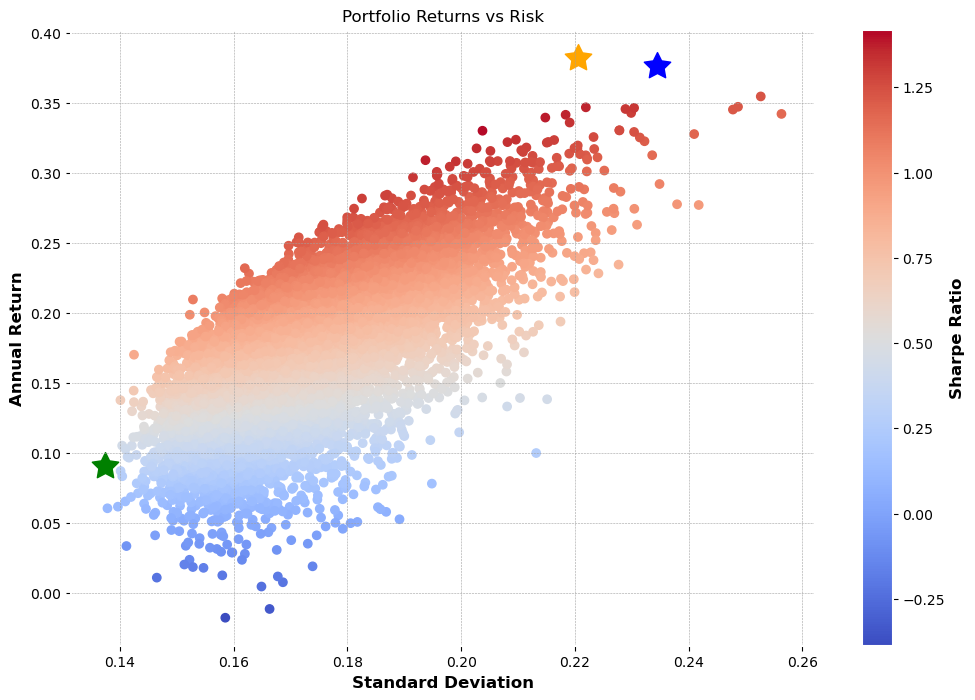

In [32]:
#Create Efficiciency Frontier Plot
plt.figure(figsize=(12,8))
plt.scatter(x= simulations_df['Volatility'], y = simulations_df['Returns'], c = simulations_df['Sharpe Ratio'], cmap = 'coolwarm')
plt.xlabel('Standard Deviation')
plt.ylabel('Annual Return')
plt.title('Portfolio Returns vs Risk')
plt.colorbar(label = 'Sharpe Ratio')

#Plot Maximum Sharpe using blue star 
plt.scatter(max_sharpe_x, max_sharpe_y, marker = (5, 1, 0), s = 400, color = 'blue')

#Plot minimum Volatility using green star
plt.scatter(min_vol_x, min_vol_y, marker = (5, 1, 0), s = 400, color = 'green')

#Plot the optimization result 
plt.scatter(optimized_metrics[1], optimized_metrics[0], marker = (5, 1, 0), s =400, color = 'orange')
plt.show()

Sector Analysis

AMZN : 0.00e+00
BAC : 5.09e-02
CVX : 0.00e+00
JNJ : 1.99e-01
JPM : 2.50e-01
META : 2.50e-01
NKE : 5.68e-16
NVDA : 2.50e-01
PFE : 6.10e-16
XOM : 0.00e+00


Text(0.5, 1.0, 'Recommended Sector Allocation')

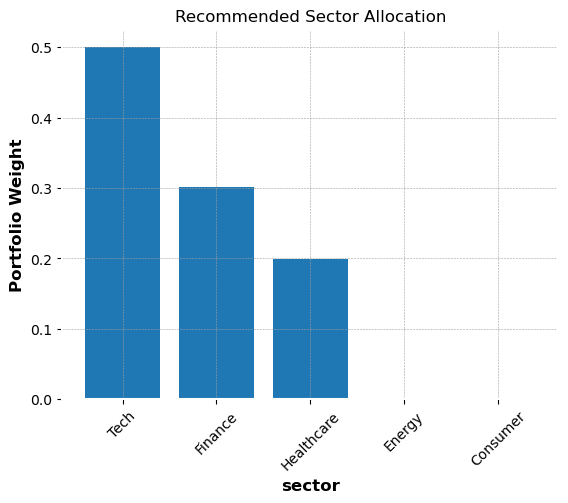

In [33]:
#Yfinance reorder the stocks alphabetically 
 #AMZN       BAC       CVX       JNJ       JPM      META       NKE  NVDA       PFE       XOM

Tech = optimized_sharpe.x[[5, 7]].sum()     
Finance = optimized_sharpe.x[[1 , 4]].sum()   
Healthcare = optimized_sharpe.x[[3 , 8]].sum()  
Energy = optimized_sharpe.x[[9, 2]].sum()    
Consumer = optimized_sharpe.x[[0 , 6]].sum()

tickers = sorted(tickers)
for tick, weight in zip(tickers, optimized_sharpe.x):
    print(f'{tick} : {weight:.2e}')



sector_labels = ['Tech', 'Finance', 'Healthcare', 'Energy', 'Consumer']
sector_values = [Tech, Finance, Healthcare, Energy, Consumer]
plt.bar(sector_labels, sector_values)
plt.xticks(rotation = 45)
plt.xlabel('sector')
plt.ylabel("Portfolio Weight")
plt.title("Recommended Sector Allocation")